# Support Vector Machine (SVM)

In [14]:
from mlxtend.plotting import plot_decision_regions
import warnings
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [15]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target
setosa_or_versicolor = (y ==0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [16]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(C=1.0, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearSVC(loss='hinge'))])

In [17]:
svm_clf.predict([[5.5, 1.7]])

array([1])

In [18]:
X_m, y_m = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline([
    ('poly_feats', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(C=10, max_iter=10000, dual=True, random_state=42))
])
polynomial_svm_clf.fit(X_m, y_m)

Pipeline(steps=[('poly_feats', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('classifier',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

<Axes: >

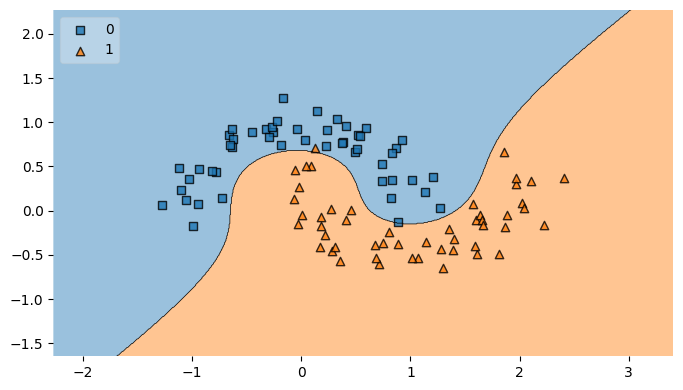

In [19]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()
plot_decision_regions(X_m, y_m, clf=polynomial_svm_clf, legend=2, ax=ax)

## Polynomial Kernel

In [20]:
poly_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_clf.fit(X_m, y_m)
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X_m, y_m)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

<Axes: >

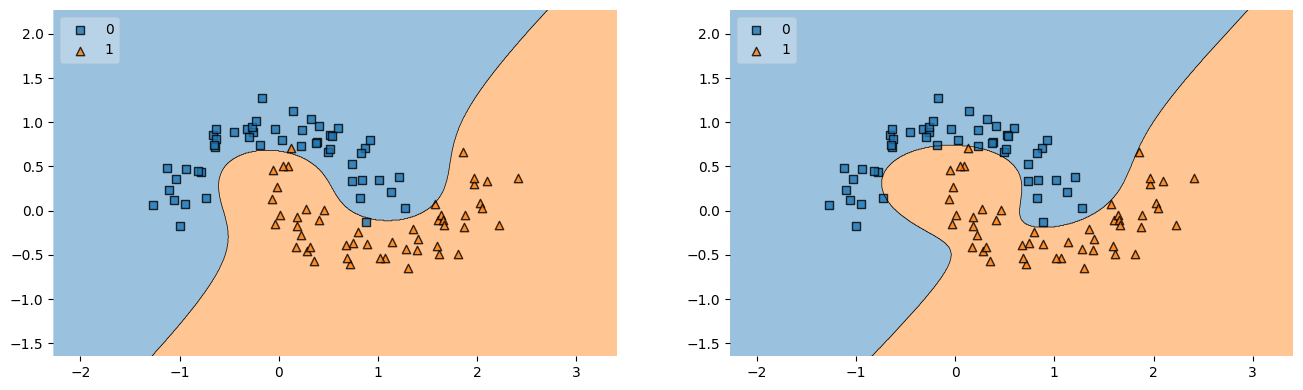

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4.5), sharey=True)
ax = axes[0]
plot_decision_regions(X_m, y_m, clf=poly_kernel_clf, legend=2, ax=ax)
ax=axes[1]
plot_decision_regions(X_m, y_m, clf=poly100_kernel_svm_clf, legend=2, ax=ax)

In [22]:
def rbf(x, gamma):
    return np.exp(-gamma * x**2)

In [23]:
x = np.linspace(0, 5, num=100)

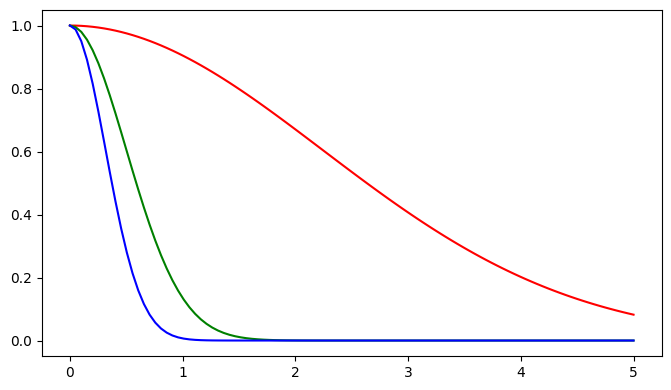

In [24]:
fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()
ax.plot(x, rbf(x, 0.1), c='red')
ax.plot(x, rbf(x, 2), c='green')
ax.plot(x, rbf(x, 5), c='blue')

Training done


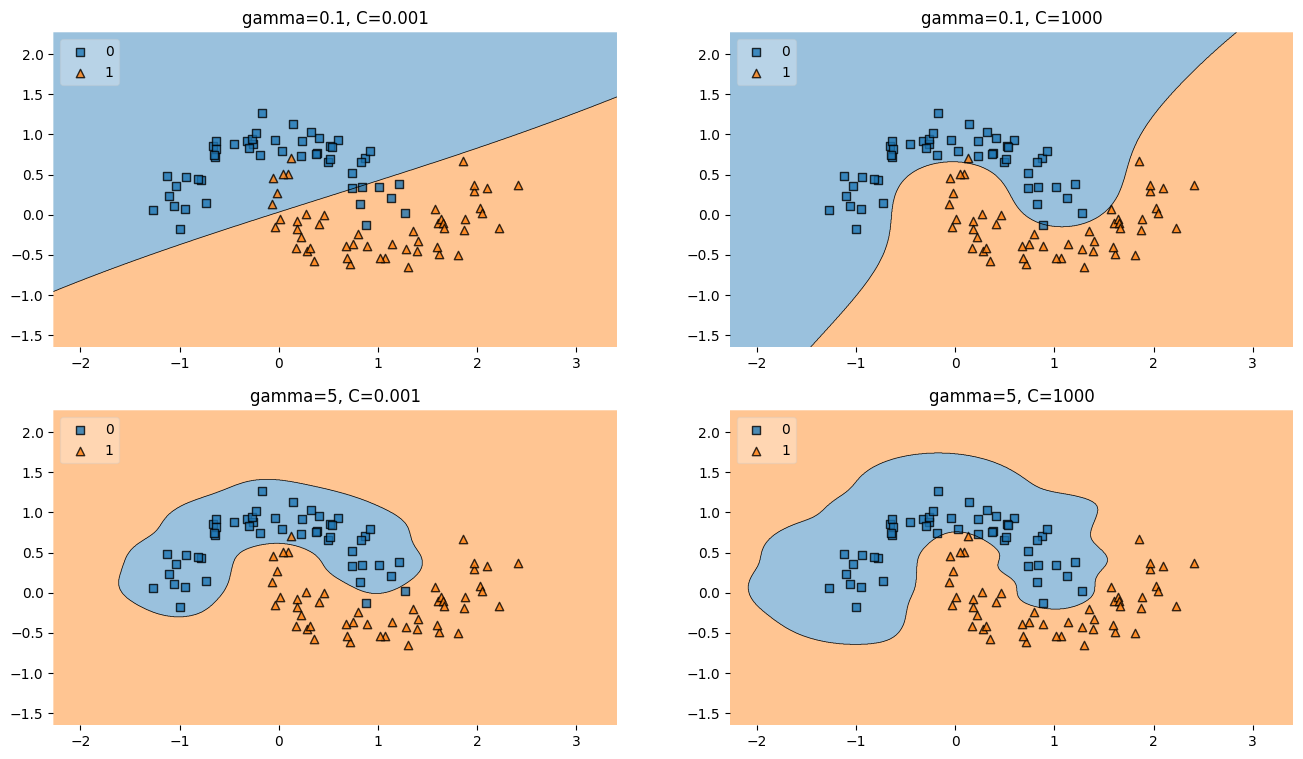

In [25]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_svm_clf = Pipeline([
        ('scaler',StandardScaler()),
        ('classifier', SVC(kernel="rbf", gamma = gamma, C = C))
    ])
    rbf_svm_clf.fit(X_m, y_m)
    svm_clfs.append(rbf_svm_clf)
print('Training done')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    ax = axes[i // 2, i % 2]
    plot_decision_regions(X_m, y_m, clf=svm_clf, legend=2, ax = ax)
    gamma, C = hyperparams[i]
    ax.set_title(f"gamma={gamma}, C={C}")